<a href="https://colab.research.google.com/github/Data-finest/Habibty/blob/main/Analyst_Insight_Presentation_Brief.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **History Extra Domain - Case Study from Immediate Media**
🤝
---

### It is noted that data analysis is a process of inspecting, cleansing, transforming and modeling data with the goal of discovering useful information, informing conclusions and supporting decision-making. Data analysis has multiple facets and approaches, encompassing diverse techniques under a variety of names, and is used in different business, science, and social science domains. In today's business world, data analysis plays a role in making decisions more scientific and helping businesses operate more effectively.
  *Here i'm going to do analysis & visualisation of Immediate Media History Extra Domain offered to a customer *.......*

In [ ]:
#Importing of Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import missingno as msno
from wordcloud import WordCloud

In [ ]:
#Mount file from google drive 
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
#Dataset of Immediate_Media
data = pd.read_csv("/content/drive/MyDrive/Analyst Insight Presentation.csv")
data.head(10)

,PAGE_TITLE,MEMBER_STATUS,COUNTRY,REFERRER,DEVICE_CATEGORY,USERS,PAGE_VIEWS,SESSIONS,DWELL_TIME,YEARMONTH
0,Who Are The Famous Women From History Who Chan...,Member,United Kingdom,Search,mobile,6,8,6,18.950000,202106
1,What Is Former Prime Minister Margaret Thatche...,Member,United Kingdom,Search,desktop,1,2,1,0.650000,202106
2,"History Articles About Winston Churchill, Brit...",Member,United Kingdom,Other,desktop,1,1,1,0.416667,202106
3,Napoleon's Height: How Tall Was Napoleon Bonap...,Member,United States,Other,desktop,2,2,2,2.133333,202106
4,Why Did The Allies Call Germans 'Huns' During ...,Anonymous,United Kingdom,Social,mobile,1,1,1,0.083333,202106
5,Did Henry VIII Consider Taking A Seventh Wife?...,Anonymous,ROW,Other,tablet,7,7,7,1.066667,202106
6,Alice Procter On Museums & Colonialism ¦ Histo...,Anonymous,United States,Direct,desktop,25,26,26,2.166667,202106
7,Sinking The Bismarck: The German Battleship's ...,Anonymous,ROW,Social,mobile,2,2,2,4.283333,202106
8,A Brief History Of The Afterlife: From The Anc...,Anonymous,United Kingdom,Other,desktop,3,3,3,0.250000,202106
9,"Have We Underestimated Mary I, aka 'Bloody Mar...",Anonymous,ROW,Direct,tablet,1,2,2,0.166667,202106


In [ ]:
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109089 entries, 0 to 109088
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   PAGE_TITLE       109089 non-null  object 
 1   MEMBER_STATUS    109089 non-null  object 
 2   COUNTRY          109089 non-null  object 
 3   REFERRER         109089 non-null  object 
 4   DEVICE_CATEGORY  109089 non-null  object 
 5   USERS            109089 non-null  int64  
 6   PAGE_VIEWS       109089 non-null  int64  
 7   SESSIONS         109089 non-null  int64  
 8   DWELL_TIME       109089 non-null  float64
dtypes: float64(1), int64(3), object(5)
memory usage: 7.5+ MB


In [ ]:
data.describe()

,USERS,PAGE_VIEWS,SESSIONS,DWELL_TIME
count,109089.000000,109089.000000,109089.000000,109089.000000
mean,15.907883,21.111872,17.590573,18.389016
std,137.839302,175.654269,148.461480,122.034766
min,1.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,1.000000,0.166667
50%,2.000000,2.000000,2.000000,1.100000
75%,5.000000,7.000000,6.000000,8.033333
max,18254.000000,20239.000000,18688.000000,11358.566670


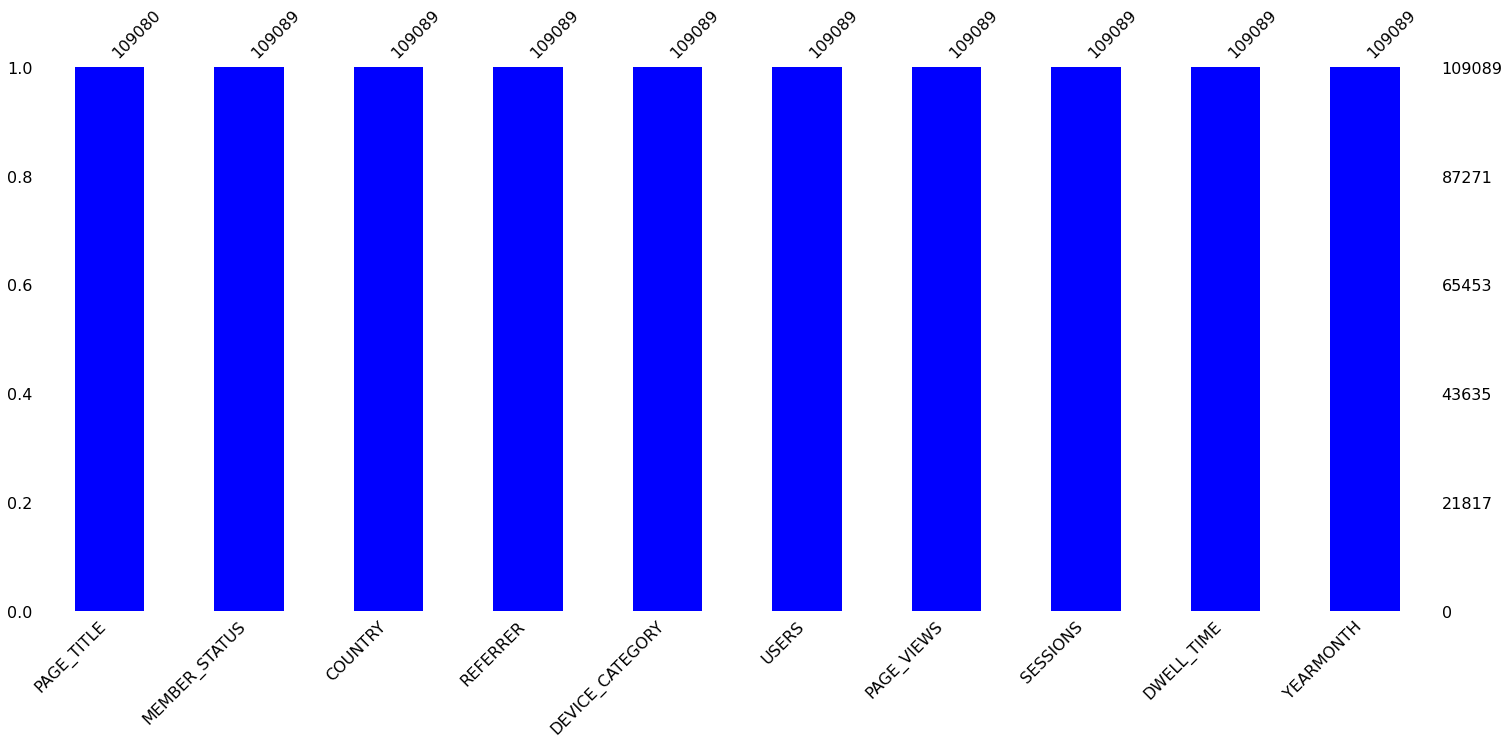

In [ ]:
# finding out if there are any null values or not
null = msno.bar(data,color='blue')



> The chart shows that in the dataset, Page_Title is the only column with null values

 

In [ ]:
#Dropping all NAN in the column axis
data.dropna(axis=1, how='all')

,PAGE_TITLE,MEMBER_STATUS,COUNTRY,REFERRER,DEVICE_CATEGORY,USERS,PAGE_VIEWS,SESSIONS,DWELL_TIME,YEARMONTH
0,Who Are The Famous Women From History Who Chan...,Member,United Kingdom,Search,mobile,6,8,6,18.950000,202106
1,What Is Former Prime Minister Margaret Thatche...,Member,United Kingdom,Search,desktop,1,2,1,0.650000,202106
2,"History Articles About Winston Churchill, Brit...",Member,United Kingdom,Other,desktop,1,1,1,0.416667,202106
3,Napoleon's Height: How Tall Was Napoleon Bonap...,Member,United States,Other,desktop,2,2,2,2.133333,202106
4,Why Did The Allies Call Germans 'Huns' During ...,Anonymous,United Kingdom,Social,mobile,1,1,1,0.083333,202106
...,...,...,...,...,...,...,...,...,...,...
109084,When Did Christianity First Arrive In Britain?...,Anonymous,United Kingdom,Direct,mobile,5,5,5,1.550000,202106
109085,The Black Death: Key Facts About The Bubonic P...,Anonymous,United Kingdom,Adestra,mobile,28,39,34,76.950000,202106
109086,The Black Death: Key Facts About The Bubonic P...,Member,United Kingdom,Adestra,mobile,10,17,14,48.600000,202106
109087,Israel & Palestine: A History Of Conflict In 8...,Anonymous,ROW,Direct,mobile,117,216,187,303.083333,202106


In [ ]:
#filling the page_Title column with most frequent Title in the dataset
x = data["PAGE_TITLE"].mode()[0]

data["PAGE_TITLE"].fillna(x, inplace = True)

In [ ]:
#checking null values
data.isnull().sum()
# data.isnull().values.any()

PAGE_TITLE         0
MEMBER_STATUS      0
COUNTRY            0
REFERRER           0
DEVICE_CATEGORY    0
USERS              0
PAGE_VIEWS         0
SESSIONS           0
DWELL_TIME         0
YEARMONTH          0
dtype: int64

In [ ]:
data.nunique()

PAGE_TITLE         8200
MEMBER_STATUS         4
COUNTRY               3
REFERRER              6
DEVICE_CATEGORY       3
USERS               875
PAGE_VIEWS         1030
SESSIONS            917
DWELL_TIME         7928
YEARMONTH             1
dtype: int64

In [ ]:
#dropping the YEARMONTH column since it has not impact in the dataset
data.drop(['YEARMONTH'],axis=1,inplace=True)

In [ ]:
#Counting of Values in each column
data["PAGE_TITLE"].value_counts(10)  

BBC History Magazine, BBC History Revealed & BBC World Histories - HistoryExtra                0.001219
Sign in                                                                                        0.001045
Jodie Turner-Smith's Anne Boleyn: Colour-Blind Casting & Historical Accuracy - HistoryExtra    0.000981
Forgotten password                                                                             0.000963
World History Podcasts – Listen Now - HistoryExtra                                             0.000944
                                                                                                 ...   
Royal cousins at war and Brunel's brilliance - HistoryExtra                                    0.000009
Galileo - HistoryExtra                                                                         0.000009
Issue 65 of BBC History Revealed Magazine - HistoryExtra                                       0.000009
Interactive iPad feature for 500th anniversary of the battle of 

In [ ]:
data["COUNTRY"].value_counts(3)  

 ROW              0.384402
United Kingdom    0.334727
United States     0.280872
Name: COUNTRY, dtype: float64

In [ ]:
data["MEMBER_STATUS"].value_counts(4)

Anonymous     0.760443
Member        0.227383
Subscriber    0.012146
Non-member    0.000028
Name: MEMBER_STATUS, dtype: float64

In [ ]:
data["USERS"].value_counts()

1       50328
2       15958
3        8371
4        5110
5        3558
        ...  
961         1
1456        1
1155        1
1725        1
897         1
Name: USERS, Length: 875, dtype: int64

In [ ]:
data["REFERRER"].value_counts(6) 

Search     0.403909
Direct     0.191798
Other      0.180357
Adestra    0.148438
Social     0.073289
AMP        0.002209
Name: REFERRER, dtype: float64

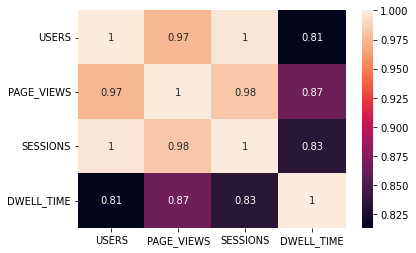

In [ ]:
#correlation plot to know the relationships betweeb the columns
correlation = data.corr()
sns.heatmap(correlation,xticklabels= correlation.columns, yticklabels=correlation.columns, annot =True)
# sns.pairplot(data)



> The correlation plot shows the relationship between the columns in the dataset,where Page_Views and Session has the highest correlation in the dataset(0.98), followed by User against Page_Views(0.97), also the Page_Views against Dwell_Time shows a strong correlation(0.87), then the least correlation happened with the Dwell_Time against Users (0.81). 


In [ ]:
# sns.pairplot(data)

In [ ]:
#Transforming choosen columns country+ page_view count 
from numpy.ma.core import count
country_page=data.groupby('COUNTRY')['PAGE_VIEWS'].count().reset_index(name='count')
country_page['percentage'] = (country_page['count'] / data['PAGE_VIEWS'].count()).round(4)
country_count =country_page.sort_values('count',ascending=False)

In [ ]:
country_count

,COUNTRY,count,percentage
0,ROW,41934,0.3844
1,United Kingdom,36515,0.3347
2,United States,30640,0.2809


Text(0.5, 0, 'count')

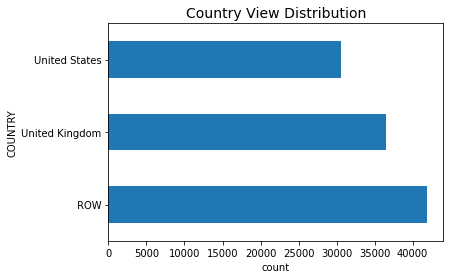

In [ ]:
country_page.plot.barh(x='COUNTRY',y='count',legend=False)
plt.title('Country View Distribution',fontsize=14)
plt.xlabel('count')



> The bar chart shows the count of the numbers users in each country who has visited the domain in June, 2021. It shows that the Republic of Wales has the highest users with 41934(38.44%), followed by the UK with 36515 (33.47%) and the US with 30640 (28.09%). 



In [ ]:
# processing some strategic columns for analysis
desk_user=data.groupby('MEMBER_STATUS')['USERS'].count().reset_index(name='count')
member_df = data[data['DEVICE_CATEGORY'] == 'desktop']
desk_grouped = member_df.groupby('MEMBER_STATUS')['USERS'].count().reset_index(name='count')
#spliting of the dataset 
desktop_status=desk_user.sort_values('count',ascending=False)
desktop_status['count_p'] = desk_grouped['count']

In [ ]:
desktop_status

,MEMBER_STATUS,count,count_p
0,Anonymous,82956,36359
1,Member,24805,13365
3,Subscriber,1325,851
2,Non-member,3,2


The Table shows the numbers of users who use the desktop device in visiting the domain. The Anonymous visitors of desktop device are seen to be the highest visitors with **36359** out of 82956, followed by the Member **13365** out of 24805,then Subscribers count is **851** out of 1325 and Non-members useage is **2** out of 3.

In [ ]:
# processing some strategic columns for analysis
users_status=data.groupby('MEMBER_STATUS')['USERS'].count().reset_index(name='count')
country_df = data[data['DEVICE_CATEGORY'] == 'mobile']
Views_grouped = country_df.groupby('MEMBER_STATUS')['USERS'].count().reset_index(name='count')
#spliting of the dataset 
mobile_status=users_status.sort_values('count',ascending=False)
mobile_status['count_p'] = Views_grouped['count']

In [ ]:
mobile_status

,MEMBER_STATUS,count,count_p
0,Anonymous,82956,32025
1,Member,24805,8120
3,Subscriber,1325,274
2,Non-member,3,1


The Table shows the numbers of users who use the mobile device in visiting the domain. The Anonymous visitors of mobile device are seen to be the highest visitors with **32025** out of 82956, followed by the Member **8120** out of 24805,then Subscribers count is **274** out of 1325 and Non-members useage is **1** out of 3.

In [ ]:
m_Time = data.groupby(mobile_status['count_p']).DWELL_TIME.mean()
mob_Time = pd.DataFrame(m_Time).reset_index()
mob_Time
# Dwell = data.groupby('MEMBER_STATUS').DWELL_TIME.mean()
# mem_status = pd.DataFrame(Dwell).reset_index()
# mem_status

,count_p,DWELL_TIME
0,1.0,0.416667
1,274.0,2.133333
2,8120.0,0.650000
3,32025.0,18.950000


In [ ]:
# processing some strategic columns for analysis
Mem_user = data.groupby('MEMBER_STATUS')['USERS'].count().reset_index(name='count')
country_df = data[data['DEVICE_CATEGORY'] == 'tablet']
Mem_grouped = country_df.groupby('MEMBER_STATUS')['USERS'].count().reset_index(name='count')
#spliting of the dataset 
tablet_status=Mem_user.sort_values('count',ascending=False)
tablet_status['count_p'] = Mem_grouped['count']

In [ ]:
tablet_status
# Viewers_status['count_p']

,MEMBER_STATUS,count,count_p
0,Anonymous,82956,14572.0
1,Member,24805,3320.0
3,Subscriber,1325,NaN
2,Non-member,3,200.0


The Table shows the numbers of users who use the tablet device in visiting the domain. The Anonymous visitors of tablet device are seen to be the highest visitors with **14572** out of 82956, followed by the Member **3320** out of 24805,then Subscribers count is **EMPTY** out of 1325 and Non-members useage is **200** out of 3.

In [ ]:
cmd = data.groupby(['COUNTRY', 'MEMBER_STATUS'])['DEVICE_CATEGORY'].count().reset_index(name='count')
cmd['percentages'] = (cmd['count'] / data['DEVICE_CATEGORY'].count()).round(4)
cmd

,COUNTRY,MEMBER_STATUS,count,percentages
0,ROW,Anonymous,31774,0.2913
1,ROW,Member,9899,0.0907
2,ROW,Subscriber,261,0.0024
3,United Kingdom,Anonymous,26764,0.2453
4,United Kingdom,Member,9165,0.0840
5,United Kingdom,Non-member,3,0.0000
6,United Kingdom,Subscriber,583,0.0053
7,United States,Anonymous,24418,0.2238
8,United States,Member,5741,0.0526
9,United States,Subscriber,481,0.0044


The table shows that Visitors of the domain comes from Rep of wales and most of them are Anonymous users 29.13%, followed by the UK visitors with 24.53% and the US 22.38%
Also,the Members visitors 

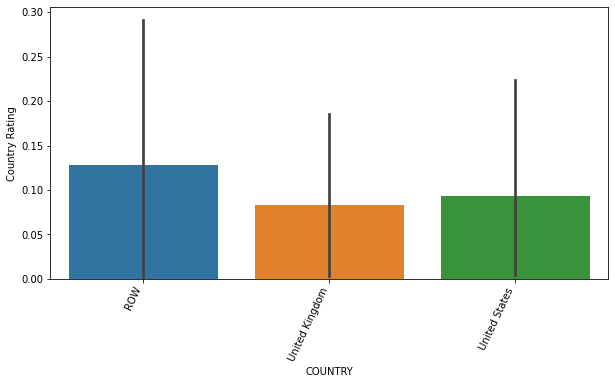

In [ ]:
plt.figure(figsize=(10,5))
chart = sns.barplot(
    data= cmd,
    x='COUNTRY',
    y='percentages'
)
chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=65, 
    horizontalalignment='right',
    fontweight='light',
 
)
chart.axes.yaxis.label.set_text("Country Rating")

The bar chart shows that ROW country users visit the domain the most, followed by the US and then UK users.

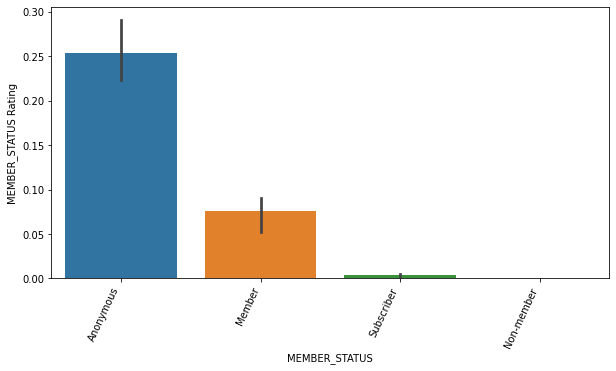

In [ ]:
plt.figure(figsize=(10,5))
chart = sns.barplot(
    data= cmd,
    x='MEMBER_STATUS',
    y='percentages'
)
chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=65, 
    horizontalalignment='right',
    fontweight='light',
 
)
chart.axes.yaxis.label.set_text("MEMBER_STATUS Rating")

The chart shows that Anonymous users are the highest visitors to the domain

In [ ]:
# Knowing the oage title users visit the most in comparison eith device_category to know users engagements.
users_desk = data.groupby('PAGE_TITLE')['USERS'].count().reset_index(name='count')
country_df = data[data['DEVICE_CATEGORY'] == 'desktop']
Tit_grouped = country_df.groupby('PAGE_TITLE')['USERS'].count().reset_index(name='count')
#spliting of the dataset 
desk_tit=users_desk.sort_values('count',ascending=False)
desk_tit['count_p'] = Tit_grouped['count']


In [ ]:
desk_tit.head(5)

,PAGE_TITLE,count,count_p
1192,"BBC History Magazine, BBC History Revealed & B...",133,1.0
5620,Sign in,114,14.0
3617,Jodie Turner-Smith's Anne Boleyn: Colour-Blind...,107,4.0
2320,Forgotten password,105,6.0
7958,World History Podcasts – Listen Now - HistoryE...,103,NaN


The table shows the "BBC History Magazine, BBC History Revealed " was the most freqent content read by most users during their visit to the domain using the desktop.

In [ ]:
# Knowing the oage title users visit the most in comparison eith device_category to know users engagements.
users_mobile=data.groupby('PAGE_TITLE')['USERS'].count().reset_index(name='count')
device_df = data[data['DEVICE_CATEGORY'] == 'mobile']
Tit_grouped = device_df.groupby('PAGE_TITLE')['USERS'].count().reset_index(name='count')
#spliting of the dataset 
mobile_tit=users_mobile.sort_values('count',ascending=False)
mobile_tit['count_p'] = Tit_grouped['count']

In [ ]:
mobile_tit.head(10)
# mobile_tit.max()

,PAGE_TITLE,count,count_p
1192,"BBC History Magazine, BBC History Revealed & B...",133,11.0
5620,Sign in,114,8.0
3617,Jodie Turner-Smith's Anne Boleyn: Colour-Blind...,107,2.0
2320,Forgotten password,105,9.0
7958,World History Podcasts – Listen Now - HistoryE...,103,NaN
7607,"Who Are The Illuminati? How To Join, All-Seein...",101,NaN
7018,User Settings - HistoryExtra,101,NaN
5530,"Search, All - HistoryExtra",100,2.0
3636,John of Gaunt: The man who would be king - His...,100,4.0
3592,"James VI And I: Life, Key Facts & Dates About ...",100,9.0


The table shows the "BBC History Magazine, BBC History Revealed " was the most freqent content read by most users during their visit to the domain using the mobile.

In [ ]:
# Knowing the oage title users visit the most in comparison eith device_category to know users engagements.
users_tab = data.groupby('PAGE_TITLE')['USERS'].count().reset_index(name='count')
device_df = data[data['DEVICE_CATEGORY'] == 'tablet']
Tit_grouped = device_df.groupby('PAGE_TITLE')['USERS'].count().reset_index(name='count')
#spliting of the dataset 
tab_tit=users_tab.sort_values('count',ascending=False)
tab_tit['count_p'] = Tit_grouped['count']

In [ ]:
# tab_tit.sort_values(by="PAGE_TITLE", ascending=False)

# tab_tit.max()
tab_tit.head(10)


,PAGE_TITLE,count,count_p
1192,"BBC History Magazine, BBC History Revealed & B...",133,2.0
5620,Sign in,114,NaN
3617,Jodie Turner-Smith's Anne Boleyn: Colour-Blind...,107,5.0
2320,Forgotten password,105,3.0
7958,World History Podcasts – Listen Now - HistoryE...,103,NaN
7607,"Who Are The Illuminati? How To Join, All-Seein...",101,NaN
7018,User Settings - HistoryExtra,101,NaN
5530,"Search, All - HistoryExtra",100,NaN
3636,John of Gaunt: The man who would be king - His...,100,3.0
3592,"James VI And I: Life, Key Facts & Dates About ...",100,3.0


The table shows the "BBC History Magazine, BBC History Revealed " was the most freqent content read by most users during their visit to the domain using the tablet.

In [ ]:
#dwelling time of members
Dwell = data.groupby('MEMBER_STATUS').DWELL_TIME.mean()
Dwell

MEMBER_STATUS
Anonymous     21.385617
Member         9.163233
Non-member     0.566667
Subscriber     3.530868
Name: DWELL_TIME, dtype: float64

In [ ]:
Dwell = data.groupby('MEMBER_STATUS').DWELL_TIME.mean()
mem_status = pd.DataFrame(Dwell).reset_index()
mem_status

,MEMBER_STATUS,DWELL_TIME
0,Anonymous,21.385617
1,Member,9.163233
2,Non-member,0.566667
3,Subscriber,3.530868


>  This table shows the average Time an individual visit the comapnies website to read content. It can be seen that, the Anonymous users spend more time (21.385617) reading a content compared to any other user. It is followed by Member users with (9.163233) and subscribers (3.530868).

In [ ]:
Mem = pd.DataFrame(data.MEMBER_STATUS.value_counts()).reset_index()
Mem.rename(columns = {'index': 'MEMBER_STATUS', 'MEMBER_STATUS': 'counts'}, inplace = True)
Mem

,MEMBER_STATUS,counts
0,Anonymous,82956
1,Member,24805
2,Subscriber,1325
3,Non-member,3



> The number of Members who view the organisations website were the Anonymous users happen to be the most users with (82956), followed by Members (24805), Subscriber (1325) and lastly, Non-member (3).



In [ ]:
Mem_merger = Mem.merge(mem_status)
Mem_merger['conversion_Rate']= round(Mem_merger.counts / Mem_merger.DWELL_TIME, 3)
Mem_merger

,MEMBER_STATUS,counts,DWELL_TIME,conversion_Rate
0,Anonymous,82956,21.385617,3879.056
1,Member,24805,9.163233,2707.014
2,Subscriber,1325,3.530868,375.262
3,Non-member,3,0.566667,5.294



This table shows that Anonymous users spend the most time on visiting the domain having spend on an average per user of 21.4 minutes per content at a conver_rate of 3879.056 using thier desktop the most, which is followed by the Member who spend 9.2 minutes per content and a conversion_rate of 2707.014, then Subscribers comes next with 3.5 minutes per content at conver_rate of 375.26 and the least are the Non-Members with 0.57 seconds at conversion_rate of 5.3.


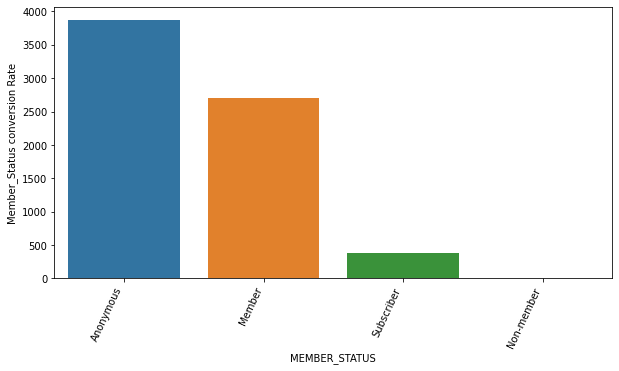

In [ ]:
plt.figure(figsize=(10,5))
chart = sns.barplot(
    data= Mem_merger,
    x='MEMBER_STATUS',
    y='conversion_Rate'
)
chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=65, 
    horizontalalignment='right',
    fontweight='light',
 
)
chart.axes.yaxis.label.set_text("Member_Status conversion Rate")

In [ ]:
# Session and Member_status
mem_session = data.groupby('MEMBER_STATUS').SESSIONS.mean()
mem_session = pd.DataFrame(mem_session).reset_index()
mem_session

,MEMBER_STATUS,SESSIONS
0,Anonymous,21.750133
1,Member,4.515501
2,Non-member,1.666667
3,Subscriber,1.978868


In [ ]:
session = pd.DataFrame(data.MEMBER_STATUS.value_counts()).reset_index()
session.rename(columns = {'index': 'MEMBER_STATUS', 'MEMBER_STATUS': 'counts'}, inplace = True)
session


,MEMBER_STATUS,counts
0,Anonymous,82956
1,Member,24805
2,Subscriber,1325
3,Non-member,3


In [ ]:
ses_merger = Mem.merge(mem_session)
ses_merger['conversion_Rate']= round(ses_merger.counts / ses_merger.SESSIONS, 3)
ses_merger


,MEMBER_STATUS,counts,SESSIONS,conversion_Rate
0,Anonymous,82956,21.750133,3814.046
1,Member,24805,4.515501,5493.300
2,Subscriber,1325,1.978868,669.575
3,Non-member,3,1.666667,1.800


The table shows that Anonymous users spend most session on an average of 21.75 with a conversion_rate of 3814, Though Member have the highest conversion_rate(5493.3) their session comes the second with an average of 4.5 per session.

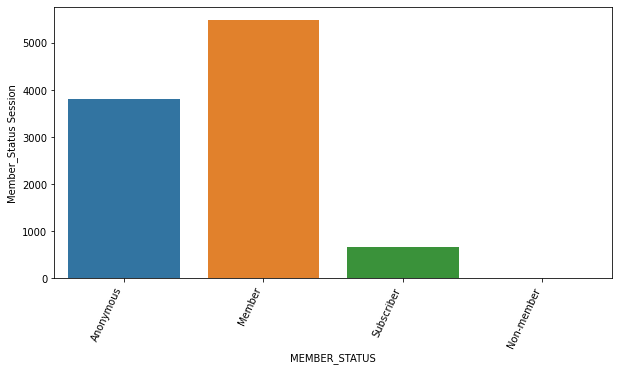

In [ ]:
plt.figure(figsize=(10,5))
chart = sns.barplot(
    data= ses_merger,
    x='MEMBER_STATUS',
    y='conversion_Rate'
)
chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=65, 
    horizontalalignment='right',
    fontweight='light',
 
)
chart.axes.yaxis.label.set_text("Member_Status Session")

The chart shows that Members have the highest conversion rate with Anonymous members coming second and subscribers comes next and Non-members as the least.

In [ ]:
# Dwell and Member_status
mem_time = data.groupby('MEMBER_STATUS').DWELL_TIME.mean()
mem_dwell = pd.DataFrame(mem_time).reset_index()
mem_dwell

,MEMBER_STATUS,DWELL_TIME
0,Anonymous,21.385617
1,Member,9.163233
2,Non-member,0.566667
3,Subscriber,3.530868


In [ ]:
#members_medium
mem_T = pd.DataFrame(data.MEMBER_STATUS.value_counts()).reset_index()
mem_T.rename(columns = {'index': 'MEMBER_STATUS', 'MEMBER_STATUS': 'counts'}, inplace = True)

mem_T

,MEMBER_STATUS,counts
0,Anonymous,82956
1,Member,24805
2,Subscriber,1325
3,Non-member,3


In [ ]:
Mem_merger = mem_T.merge(mem_dwell)
Mem_merger['conversion_Rate']= round(Mem_merger.counts / Mem_merger.DWELL_TIME, 3)
Mem_merger

,MEMBER_STATUS,counts,DWELL_TIME,conversion_Rate
0,Anonymous,82956,21.385617,3879.056
1,Member,24805,9.163233,2707.014
2,Subscriber,1325,3.530868,375.262
3,Non-member,3,0.566667,5.294


This table shows that Anonymous users spend more time visiting the domain and have the highest conversion_Rate, followed by the Member with 9.2 minutes and a conversion_rate of 2707 and Subscribers with 3.53minutes and conversion rate of 375.262.

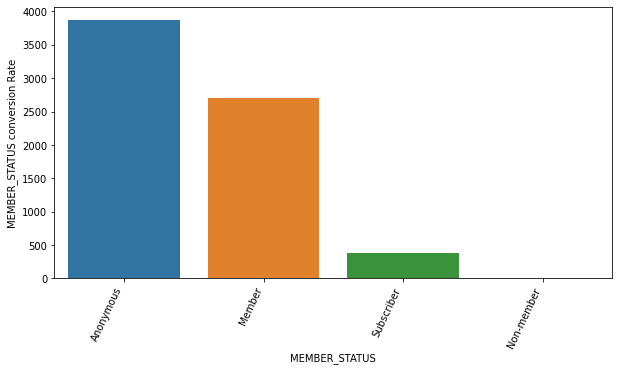

In [ ]:
plt.figure(figsize=(10,5))
chart = sns.barplot(
    data= Mem_merger,
    x='MEMBER_STATUS',
    y='conversion_Rate'
)
chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=65, 
    horizontalalignment='right',
    fontweight='light',
 
)
chart.axes.yaxis.label.set_text("MEMBER_STATUS conversion Rate")

The bar chart shows the rate at which users visit the domain.

In [ ]:
data.REFERRER.value_counts()

Search     44062
Direct     20923
Other      19675
Adestra    16193
Social      7995
AMP          241
Name: REFERRER, dtype: int64

In [ ]:
#Referrer_medium
Ref = pd.DataFrame(data.REFERRER.value_counts()).reset_index()
Ref.rename(columns = {'index': 'REFERRER', 'REFERRER': 'counts'}, inplace = True)

Ref

,REFERRER,counts
0,Search,44062
1,Direct,20923
2,Other,19675
3,Adestra,16193
4,Social,7995
5,AMP,241


In [ ]:
#Refferer medium
vw = data.groupby('REFERRER').DWELL_TIME.mean()
vw_Ref = pd.DataFrame(vw).reset_index()#.rename(columns = {'index': 'Channel_1'}, inplace = True)
vw_Ref

,REFERRER,DWELL_TIME
0,AMP,2.449585
1,Adestra,18.935676
2,Direct,9.594655
3,Other,10.573377
4,Search,27.536013
5,Social,9.599954


In [ ]:
conversion_Rate = round(44062 / 27.536013, 2) 
conversion_Rate

1600.16

In [ ]:
#Referrer _conversion_Rate
Ref_merger = Ref.merge(vw_Ref)
Ref_merger['conversion_Rate']= round(Ref_merger.counts / Ref_merger.DWELL_TIME, 2)
Ref_merger

,REFERRER,counts,DWELL_TIME,conversion_Rate
0,Search,44062,27.536013,1600.16
1,Direct,20923,9.594655,2180.69
2,Other,19675,10.573377,1860.81
3,Adestra,16193,18.935676,855.16
4,Social,7995,9.599954,832.82
5,AMP,241,2.449585,98.38


This table shows that visitors who came through search to the domain of the company spend more time (**27.54 minutes**) and their conversion_rate is 1600 out of 44062, followed by the direct visitors of the domain (**2180.69 out of 20,923**) and spend on an average of **9.6 minutes**, while visitors through Other channel spend on an average **10.57 min** where their conversion_rate is **1860.81 out of 19675**.

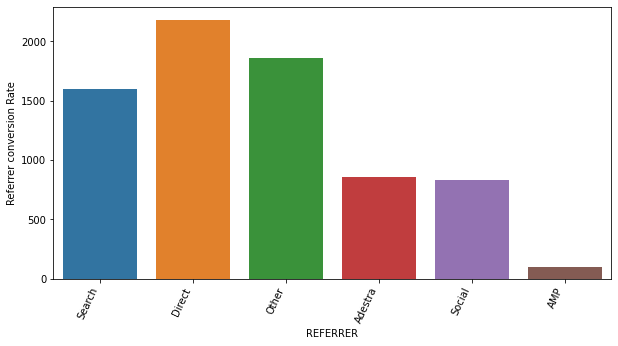

In [ ]:
plt.figure(figsize=(10,5))
chart = sns.barplot(
    data= Ref_merger,
    x='REFERRER',
    y='conversion_Rate'
)
chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=65, 
    horizontalalignment='right',
    fontweight='light',
 
)
chart.axes.yaxis.label.set_text("Referrer conversion Rate")

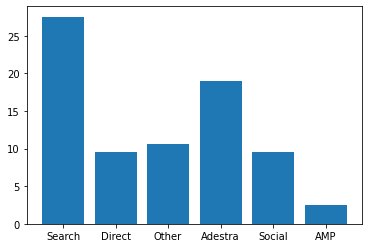

In [ ]:
plt.bar(x= 'REFERRER', height= 'DWELL_TIME', data=Ref_merger)
plt.show()

In [ ]:
Dev = pd.DataFrame(data.DEVICE_CATEGORY.value_counts()).reset_index()
Dev.rename(columns = {'index': 'DEVICE_CATEGORY', 'DEVICE_CATEGORY': 'counts'}, inplace = True)

Dev

,DEVICE_CATEGORY,counts
0,desktop,50577
1,mobile,40420
2,tablet,18092


In [ ]:
Dev_T = data.groupby('DEVICE_CATEGORY').DWELL_TIME.mean()
Dev_Time = pd.DataFrame(Dev_T).reset_index()
Dev_Time

,DEVICE_CATEGORY,DWELL_TIME
0,desktop,16.563335
1,mobile,25.117640
2,tablet,8.460122


In [ ]:
Dev_merger = Dev.merge(Dev_Time)
Dev_merger['conversion_Rate']= round(Dev_merger.counts / Dev_merger.DWELL_TIME, 3)
Dev_merger

,DEVICE_CATEGORY,counts,DWELL_TIME,conversion_Rate
0,desktop,50577,16.563335,3053.552
1,mobile,40420,25.117640,1609.228
2,tablet,18092,8.460122,2138.503


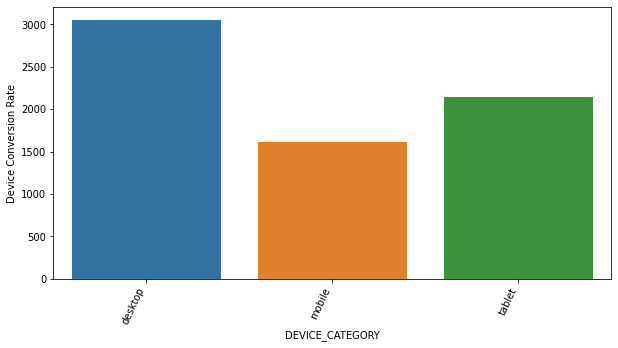

In [ ]:
plt.figure(figsize=(10,5))
chart = sns.barplot(
    data= Dev_merger,
    x='DEVICE_CATEGORY',
    y='conversion_Rate'
)
chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=65, 
    horizontalalignment='right',
    fontweight='light',
 
)
chart.axes.yaxis.label.set_text("Device Conversion Rate")

The bar chart shows that desktop user have the highest conversion_Rate-3053.552 and count-50577	with the second in terms of Dwelling_Time of an average of 16.6 minutes on an articule. Also, if we are to look at the second highest, the tablet users comes next, with 2138.5 and an average Dwelling_Time of 8.5 minute. The next is the mobile users, though they happen to spend most dwelling_time-25.1 minutes but their conversion rate happens to be the least withb just 1609.

*Revenue sug- will be to 

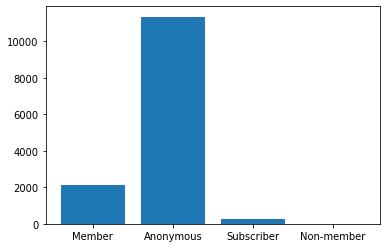

In [ ]:
Dwell_Status= pd.DataFrame(data).reset_index()
# sns.countplot(r['DWELL_TIME'])
plt.bar(x= 'MEMBER_STATUS', height= 'DWELL_TIME', data=Dwell_Status)
plt.show()

It is obvious that Anonymous members spend the most time using the domain


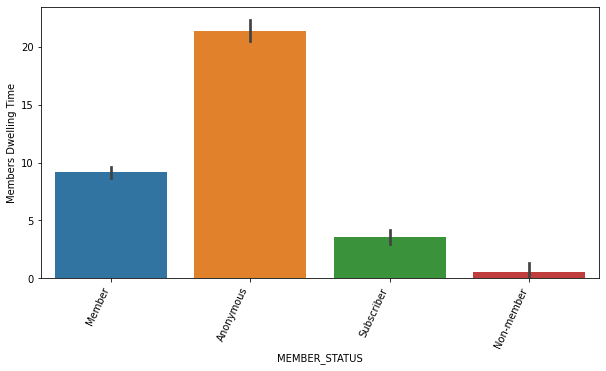

In [ ]:
plt.figure(figsize=(10,5))
chart = sns.barplot(
    data= Dwell_Status,
    x='MEMBER_STATUS',
    y='DWELL_TIME'
)
chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=65, 
    horizontalalignment='right',
    fontweight='light',
 
)
chart.axes.yaxis.label.set_text("Members Dwelling Time")

It is obvious that Anonymous members spend the most time using the domain


In [ ]:
# Session and Member_status *Content exploration

Page_Time = data.groupby('PAGE_TITLE').DWELL_TIME.mean()
Page_Time = pd.DataFrame(Page_Time).reset_index()
Page_Time

,PAGE_TITLE,DWELL_TIME
0,#NAME?,0.138889
1,"'4,000-year-old skeleton' uncovered near Winds...",0.083333
2,'Ask your father': the general election of 194...,0.166667
3,'Britain needs police museum' says crime histo...,0.127778
4,'Darkest Hour': an interview with director Joe...,3.076190
...,...,...
8195,“Studying history is the ultimate passport to ...,3.048958
8196,“The anglocentric view we have of British hist...,2.215385
8197,“The worst journey in the world”: the Arctic c...,0.160417
8198,“We are all Trojans...”: Homer’s poetic legacy...,5.111111


In [ ]:
Page_Time.max()
# Page_Time.min()


PAGE_TITLE    “We die like brothers”: The sinking of the SS ...
DWELL_TIME                                           606.421178
dtype: object

In [ ]:
page = pd.DataFrame(data.PAGE_TITLE.value_counts()).reset_index()
page.rename(columns = {'index': 'PAGE_TITLE', 'PAGE_TITLE': 'counts'}, inplace = True)


In [ ]:
pf = pd.DataFrame(data.PAGE_TITLE.value_counts()[0:10])

In [ ]:
from numpy.ma.core import count
pf_page=data.groupby('PAGE_TITLE')['DWELL_TIME'].count().reset_index(name='count')
# pf['count']=data.groupby('Customer Occupation Status')['PAGE_VIEWS'].transform('count')
pf['perc'] = (pf_page['count'] / data['DWELL_TIME'].count()).round(4)
page_status=pf_page.sort_values('count',ascending=False)

In [ ]:
page_merger = page.merge(Page_Time)
page_merger['conversion_Rate']= round(page_merger.counts / page_merger.DWELL_TIME, 3)
page_merger.head(10)

,PAGE_TITLE,counts,DWELL_TIME,conversion_Rate
0,"BBC History Magazine, BBC History Revealed & B...",133,606.421178,0.219
1,Sign in,114,279.649123,0.408
2,Jodie Turner-Smith's Anne Boleyn: Colour-Blind...,107,127.794237,0.837
3,Forgotten password,105,58.871111,1.784
4,World History Podcasts – Listen Now - HistoryE...,103,105.830259,0.973
5,"Who Are The Illuminati? How To Join, All-Seein...",101,138.541089,0.729
6,User Settings - HistoryExtra,101,35.464851,2.848
7,"Search, All - HistoryExtra",100,73.678000,1.357
8,"James VI And I: Life, Key Facts & Dates About ...",100,275.390667,0.363
9,John of Gaunt: The man who would be king - His...,100,48.464500,2.063


The table shows the time spent on reading a page_title by most users

In [ ]:
Page_sess = data.groupby('PAGE_VIEWS').SESSIONS.mean()
Page_sess

PAGE_VIEWS
1            1.000000
2            1.694337
3            2.504715
4            3.168035
5            4.113254
             ...     
11091    10360.000000
11999    10815.000000
13978    12451.000000
14492    13134.000000
20239    18688.000000
Name: SESSIONS, Length: 1030, dtype: float64

REPORT:
USER ENGAGEMANT
It is noticed that the anonymous users are seen to have the highest number with 82956 with a conve_rate of 3879, they also spend the most time (21.4 minutes) reading a content on the domain compared to other member_status. If we can look closely at the medium of REFERRER, it will be noticed that users visit the most through the search medium and spending on an avg of 27.54 minutes compared to Adestra medium of 18.9 minutes, while the Other medium and the Direct medium are 10.6 minutes respectively.
Also, the conv_rate shows that the Direct medium of engagement is the highest with 2180.7 compared to the other medium 1860.8 and followed by the Search 1600 and Adestra 855.16.

Suggestion: 
If Immediate-Media were to generate revenue and have more users visit their domain, the Anonymous users have to be converted them to Subscribers using various initiative since they often visit. To dive further into the data, if we can assume the input of the Age_Range of the users, we would notice that the device with most users are the desktop user while also looking at the Page_Title with the most sort after it happens to be the BBC histtory and BBC magzine, this shows that older people spend the most time visiting the domain. 